In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# グラフをブラウザ内に表示
%matplotlib inline


## データ読み込み

In [18]:
X_train_std = pd.read_csv('data/wine_X_train_st.csv')
y_train = pd.read_csv('data/wine_y_train.csv')

In [19]:
X_test_std = pd.read_csv('data/wine_X_test_st.csv')
y_test = pd.read_csv('data/wine_y_test.csv')

In [21]:
df_wine = pd.read_csv('data/wine.csv')

In [22]:
X_train_std.head()

,alcohol,malic-acid,ash,alcalinity-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,diluted-wine,profile
0,0.910831,-0.462599,-0.011426,-0.820679,0.062417,0.588204,0.935654,-0.761914,0.130072,-0.512387,0.657066,1.943545,0.937010
1,-0.956099,-0.966087,-1.537254,-0.147487,-0.554019,0.169986,0.072432,0.207913,0.784626,-0.982107,-0.408595,0.581180,-1.413367
2,0.359522,1.675016,-0.374718,0.133010,1.363782,-1.118128,-1.314889,0.531189,-0.440566,2.220529,-1.559509,-1.448466,0.286837
3,0.221695,1.047864,-0.774340,0.413506,0.130910,-1.268687,-1.458759,0.531189,-0.524483,-0.426984,-1.516883,-1.281645,0.270582
4,1.098777,-0.771758,1.114780,1.535493,-0.964977,1.156982,0.915101,-1.246827,0.432174,-0.691735,1.722727,0.775804,-1.094782


## L1正則化ロジスティック回帰

In [23]:
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
lr = LogisticRegression(penalty='l1', C=0.1)

In [25]:
lr.fit(X_train_std, y_train)

/usr/local/opt/pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print('Training accuracy :', lr.score(X_train_std, y_train))

Training accuracy : 0.983870967742


In [14]:
print('Test accuracy :', lr.score(X_test_std, y_test))

Test accuracy : 0.981481481481


In [15]:
# 重み係数の表示
lr.coef_

array([[ 0.28024196,  0.        ,  0.        , -0.02778865,  0.        ,
         0.        ,  0.71012339,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.2361308 ],
       [-0.64401226, -0.06874934, -0.05719454,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92671481,
         0.06018969,  0.        , -0.37104642],
       [ 0.        ,  0.06158987,  0.        ,  0.        ,  0.        ,
         0.        , -0.63546614,  0.        ,  0.        ,  0.49785408,
        -0.35828629, -0.57173588,  0.        ]])

## L1正則化の係数

/usr/local/opt/pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/opt/pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/opt/pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/opt/pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataC

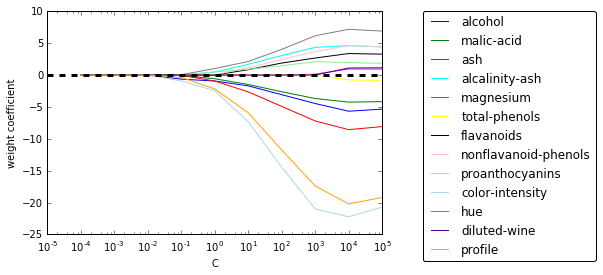

In [16]:
# 描画の準備
fig = plt.figure()
ax = plt.subplot(111)

# 各係数の色のリスト
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

# 空のリストを作成（重み係数、逆正則化パラメータ）
weights, params = [], []
# 逆正則化パラメータの値ごとに処理
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

# 各重み係数をNumPy配列に変換
weights = np.array(weights)

# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
## plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()